In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
data =pd.read_csv('bankloan.csv')
data



,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
Y=data['Personal.Loan']

In [4]:
X = data.drop(['Personal.Loan'], axis = 1)

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)


In [6]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [7]:
y_pred = rf.predict(X_test)

In [8]:
accuracy =accuracy_score(Y_test,y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.99


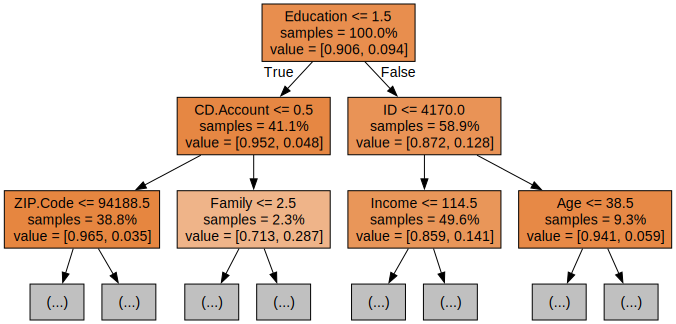

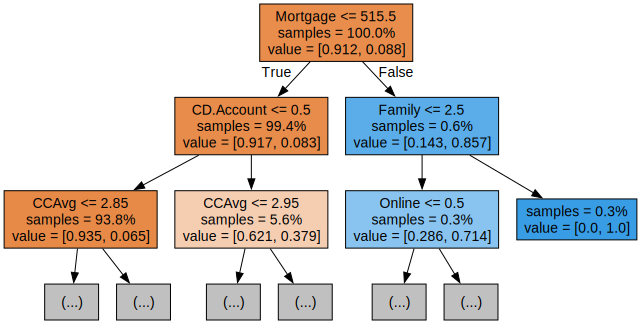

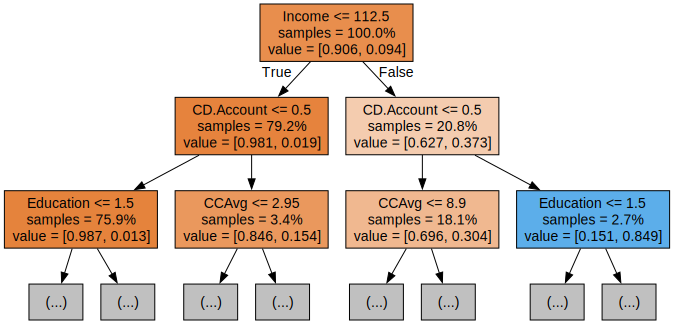

In [9]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data=export_graphviz(tree,feature_names=X_train.columns,filled=True,max_depth=2,impurity=False,proportion=True)
    graph=graphviz.Source(dot_data)
    display(graph)


In [10]:
from sklearn.model_selection import RandomizedSearchCV
n_arr = [100,150,250]
acc =[]
for n in n_arr:
  rf=RandomForestClassifier(n_estimators=n)
  rf.fit(X_train, Y_train)
  y_pred = rf.predict(X_test)
  accuracy =accuracy_score(Y_test,y_pred)
  acc.append(accuracy)
acc

[0.991, 0.989, 0.988]

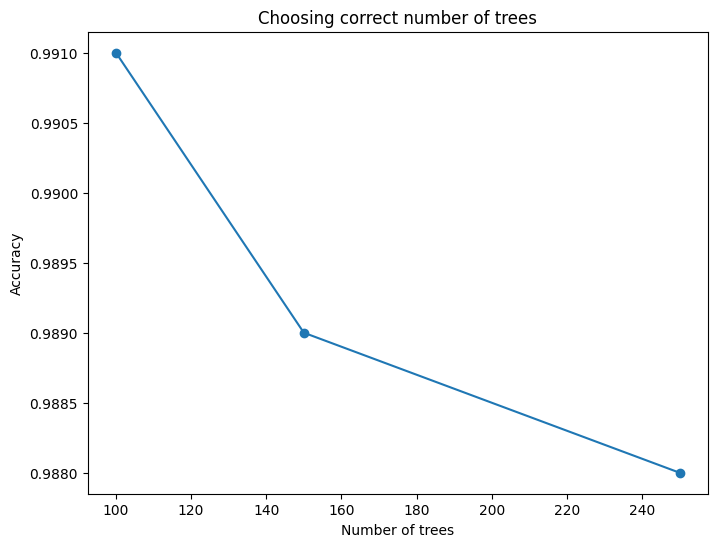

Best number of trees: 100


In [11]:
# Plot the accuracy scores for different number of trees
plt.figure(figsize=(8, 6))
plt.plot(n_arr, acc, marker='o')
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.title("Choosing correct number of trees")
plt.show()

# Choose the number of trees that gives the highest accuracy
best_n_trees = n_arr[np.argmax(acc)]
print(f"Best number of trees: {best_n_trees}")


In [12]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [13]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}  # Note, oob_score only makes sense when bootstrap=True!